In [1]:
%run ../../import_src.py
# Copare to CNS1_NvN_Cir_fulldata. Same parameters, Needell vs Haddock SSNMF.
import lymedata
from lymedata import *
import constants
from constants import *

import needell_ssnmf
from needell_ssnmf import Needell_SSNMF


import display_ssnmf
from display_ssnmf import *


In [ ]:
data = LymeData({CHRONIC, NEURO, NON_NEURO},{ADDL_CIR, DIAG_CIR, CATG},{NEURO, NON_NEURO}, defn=DEF_CNS1, drop_99=True)
print(data.df.shape)
print(data.df.columns)

data_matrix, label_matrix = data.get_data_and_labels()

ssnmf = Needell_SSNMF(data_matrix, label_matrix)
best_accuracy, best_params, accu_distr, Xreconerr_distr, Yreconerr_distr,_ = ssnmf.gridsearch(param_range={'k': range(2,7),'lambda': list(np.linspace(0,1,100)), 'random_state': range(0,100)},
                                                          get_topic_accu_distr=True, get_reconerr_distr=True)

Both Neuro and Mus: 2259
Only Neuro: 310
Only Mus: 762
Neither Neuro nor Mus: 632
Dropping 99
(878, 29)
Index(['recall a tick bite', 'length of time noticed tick bite',
       'treated with antibiotics', 'length of time treated for tick bite',
       'period of time for diagnosis', 'misdiagnosis', 'tick born coinfection',
       'Babesia', 'Bartonella', 'Ehrlichia/ Anaplasma', 'Mycoplasma',
       'Rickettsia', 'Bio Sex', 'Antibiotics', 'Times Infected', 'GROC',
       'Bed Days', 'Mental Health Days', 'Physical Health Days', 'Disability',
       'general practitioner', 'infectious disease specialist', 'internist',
       'lyme specialist', 'other doctor', 'pediatrician', 'rheumatologist',
       'neuro', 'non_neuro'],
      dtype='object')


/home/reu24lyme/alex/code_lib/src/lymedata.py:74: DtypeWarning: Columns (224,249,259,269,274,294,299,304,309,339,344,365,369,373,377,395,399,403,411,415,419,423,435) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


CNS1 Working Definition: Neuro vs Non-Neuro
best accuracy:  0.6480952380952382  best params:  {'k': 6, 'lambda': 0.22222222222222224, 'random_state': 84}
test_accuracy:  0.5568181818181818


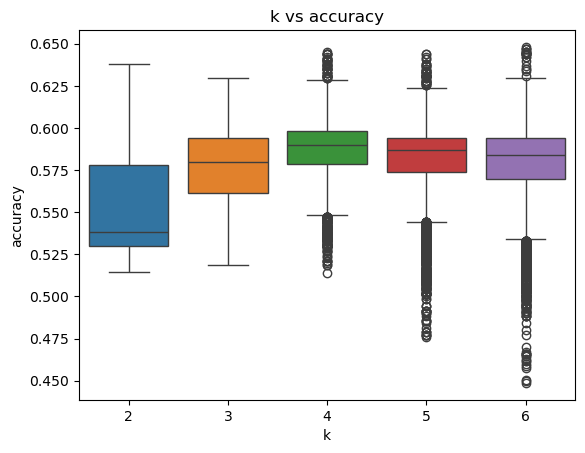

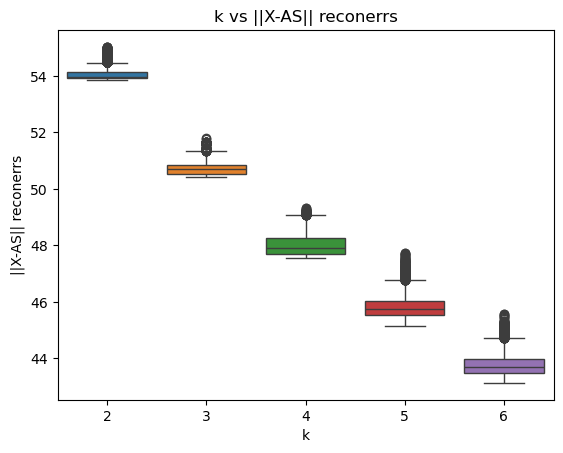

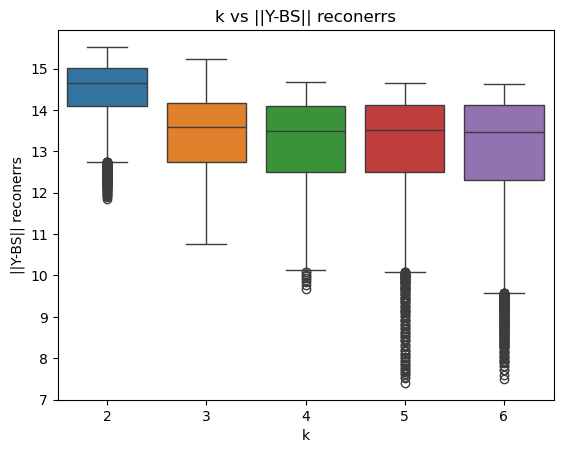

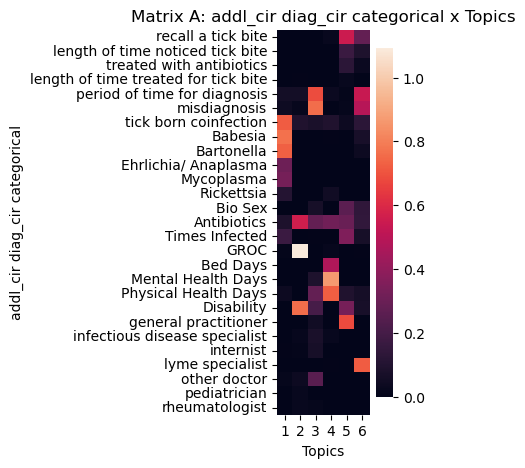

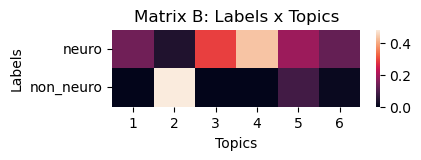

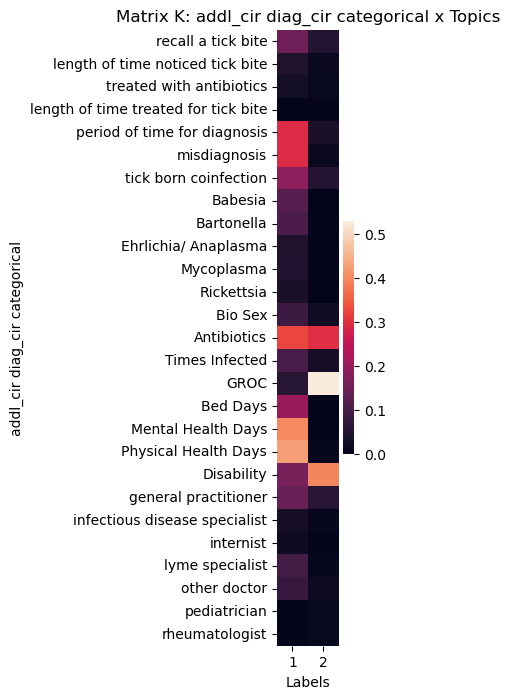

In [4]:
print('CNS1 Working Definition: Neuro vs Non-Neuro')
print('best accuracy: ', best_accuracy, ' best params: ', best_params)
test_accuracy = ssnmf.test(best_params)
print('test_accuracy: ', test_accuracy)

display_distr(accu_distr)
display_distr(Xreconerr_distr, ylabel='||X-AS|| reconerrs')
display_distr(Yreconerr_distr, ylabel='||Y-BS|| reconerrs')

names = ADDL_CIR + " "+ DIAG_CIR + " " + CATG
labels = [x for x in data.df.columns if x not in [NEURO, NON_NEURO]]
best_model = ssnmf.best_model
display_ssnmf(model=best_model, feature_name=names, feature_labels=labels, class_labels=data.labels)


In [5]:
accu_distr.to_csv('CNS1_NvN_Cir_ND_accu_distr.csv', index=False)
Xreconerr_distr.to_csv('CNS1_NvN_Cir_ND_Xreconerr_distr.csv', index=False)
Yreconerr_distr.to_csv('CNS1_NvN_Cir_ND_Yreconerr_distr.csv', index=False)

In [6]:
# Accuracy distribution statistics
mean = accu_distr.mean()
Q1 = accu_distr.quantile(0.25)
Q3 = accu_distr.quantile(0.75)
print('Mean Accuracy:')
print(mean)
print('IQR:')
print(Q3 - Q1)

Mean Accuracy:
2    0.552759
3    0.578687
4    0.587061
5    0.582041
6    0.579049
dtype: float64
IQR:
2    0.048359
3    0.032746
4    0.019990
5    0.019949
6    0.024144
dtype: float64


In [7]:
# Xreconerr distribution statistics
mean = Xreconerr_distr.mean()
Q1 = Xreconerr_distr.quantile(0.25)
Q3 = Xreconerr_distr.quantile(0.75)
print('Mean Xreconerr_distr:')
print(mean)
print('IQR:')
print(Q3 - Q1)

Mean Xreconerr_distr:
2    54.088805
3    50.722987
4    48.018027
5    45.796467
6    43.753192
dtype: float64
IQR:
2    0.222616
3    0.325372
4    0.546780
5    0.489150
6    0.498493
dtype: float64


In [8]:
# Yreconerr distribution statistics
mean = Yreconerr_distr.mean()
Q1 = Yreconerr_distr.quantile(0.25)
Q3 = Yreconerr_distr.quantile(0.75)
print('Mean Yreconerr_distr:')
print(mean)
print('IQR:')
print(Q3 - Q1)

Mean Yreconerr_distr:
2    14.501521
3    13.376262
4    13.250781
5    13.202887
6    13.066477
dtype: float64
IQR:
2    0.908119
3    1.419946
4    1.592001
5    1.617178
6    1.819699
dtype: float64
